In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math


In [2]:
df = pd.read_csv("Student_Performance.csv")
# Convert categorical column to numeric (Yes=1, No=0)
df['Extracurricular Activities'] = (df['Extracurricular Activities'] == 'Yes').astype(int)
print(df.head())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [3]:
# training arrays from the given dataset
x_train = df.iloc[:, :-1].to_numpy()
y_train = df.iloc[:, -1].to_numpy()

# Normalize features to prevent overflow
x_mean = np.mean(x_train, axis=0)
x_std = np.std(x_train, axis=0)
x_norm = (x_train - x_mean) / (x_std + 1e-8)

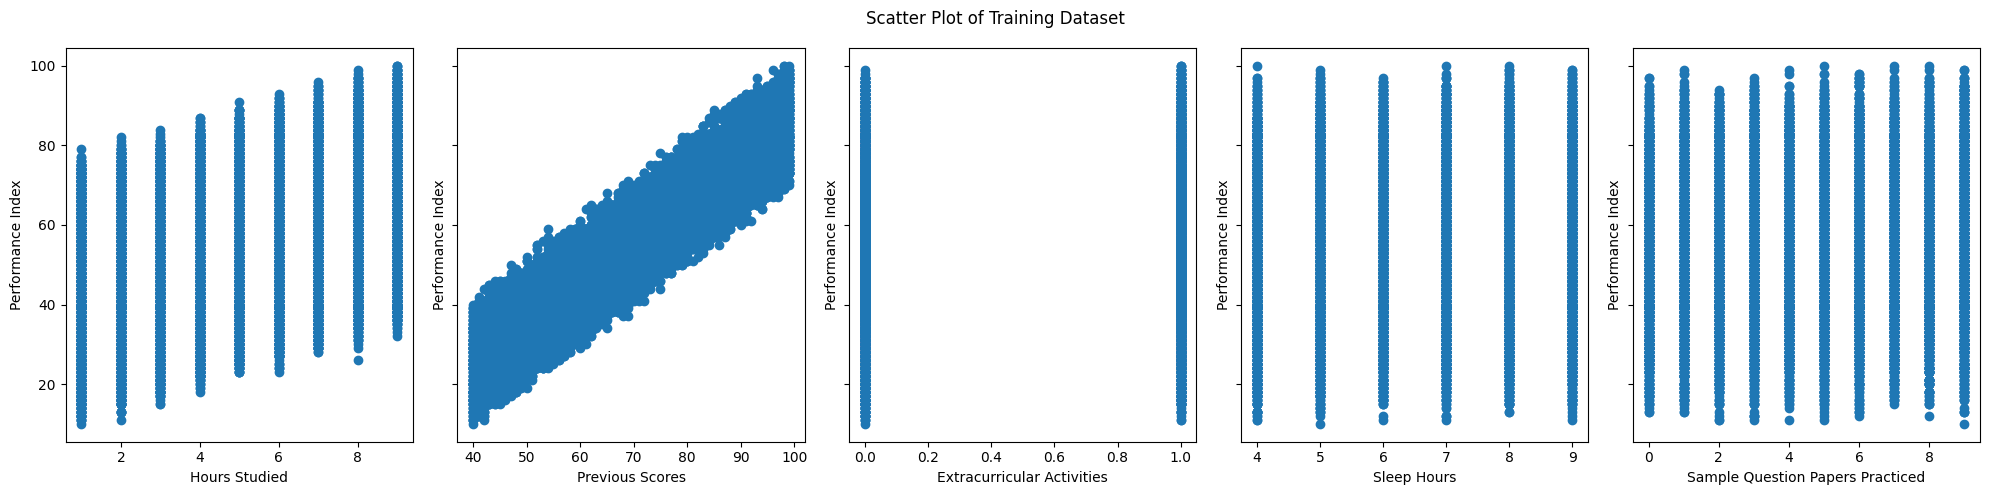

In [4]:
# plotting the training data
X_labels = ["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]
fig, ax = plt.subplots(1, x_train.shape[1], figsize=(20, 5), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(x_train[:, i], y_train)
    ax[i].set_ylabel("Performance Index")
    ax[i].set_xlabel(X_labels[i])

fig.suptitle("Scatter Plot of Training Dataset")
plt.tight_layout()
plt.show()

In [5]:
# this is to predict the output of linear regression function
def predict(w, X, b):
    m = X.shape[0]
    yp = np.zeros(m)
    for i in range(m):
        yp[i] = np.dot(X[i], w) + b
    return yp

In [6]:
# cost function
def cost_function(X, y, w, b):
    m = X.shape[0]
    cost = 0.00
    
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i])**2
    cost = cost/(2*m)
    return cost

In [7]:
# computing the gradient dj/dw and dj/db

def gradients(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        dj_dw += err * X[i]
        dj_db += err
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw, dj_db


In [8]:
# implementation of gradient descent
def grad_desc(X, y, w_init, b_init, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    iter_history = []
    w = copy.deepcopy(w_init)
    b = b_init

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        J_history.append(cost_function(X, y, w, b))
        iter_history.append(i)

        if i%math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost: {J_history[-1]:8.4f}")

    return w, b, J_history, iter_history


Iteration    0: Cost: 1706.0215
Iteration 1000: Cost: 232.8061
Iteration 2000: Cost:  33.3248
Iteration 3000: Cost:   6.3088
Iteration 4000: Cost:   2.6492
Iteration 5000: Cost:   2.1534
Iteration 6000: Cost:   2.0862
Iteration 7000: Cost:   2.0771
Iteration 8000: Cost:   2.0759
Iteration 9000: Cost:   2.0757
Final w = [ 7.38643906 17.66112591  0.30649486  0.81494365  0.55577474], b = 55.22230531100317


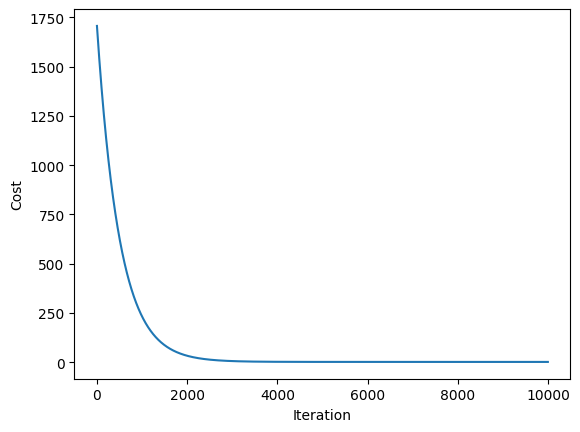

In [9]:
alpha = 0.001
w_init = np.zeros(x_norm.shape[1])
b_init = 0.0
iterations = 10000
w, b, J_history, iter_history = grad_desc(X=x_norm, y=y_train, w_init=w_init, b_init=b_init, cost_function=cost_function, gradient_function=gradients, alpha=alpha, num_iters=iterations)
print(f"Final w = {w}, b = {b}")
# plotting cost function with each iteration
plt.plot(iter_history, J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.show()


In [10]:

y_hat = predict(w, x_norm, b)


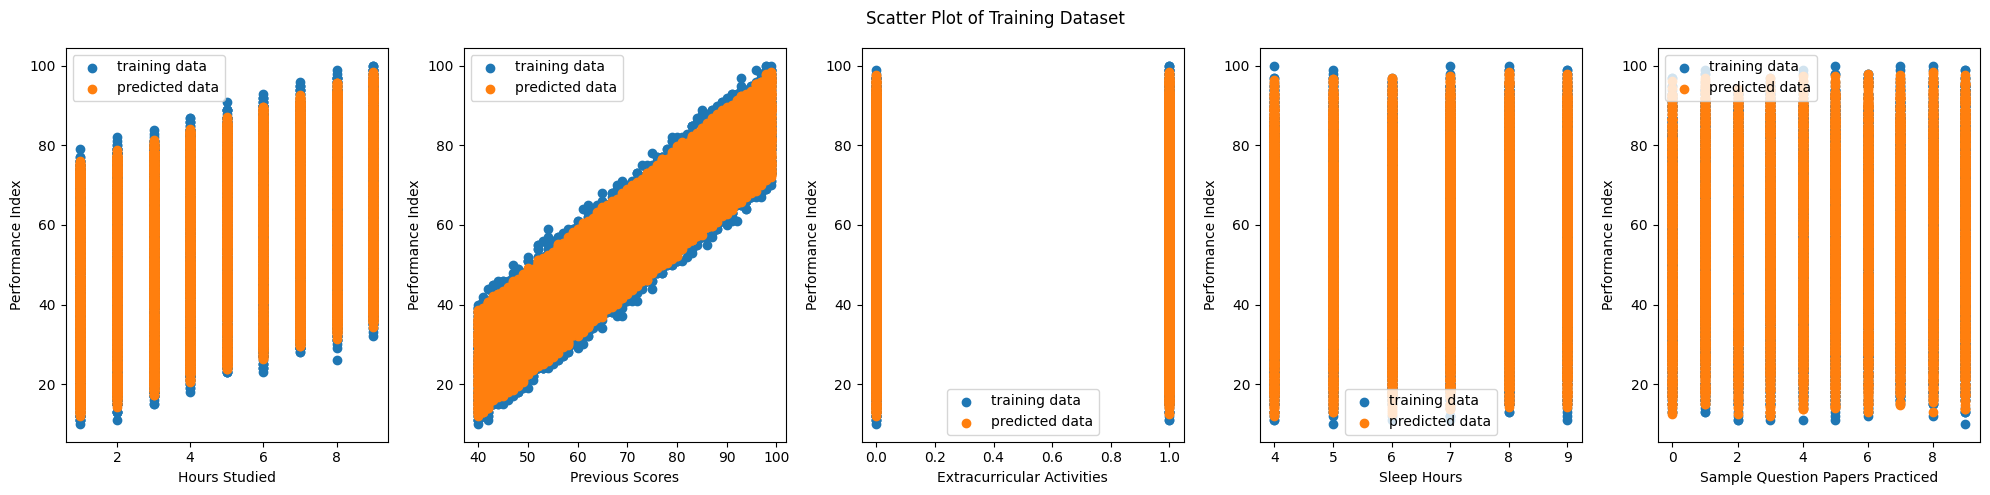

In [11]:
# plotting the training data
fig, ax = plt.subplots(1, x_train.shape[1], figsize=(20, 5))
fig.suptitle("Scatter Plot of Training Dataset")

for i in range(len(ax)):
    ax[i].scatter(x_train[:, i], y_train, label = "training data")
    ax[i].scatter(x_train[:, i], y_hat, label = "predicted data")
    ax[i].set_ylabel("Performance Index")
    ax[i].set_xlabel(X_labels[i])
    ax[i].legend()

plt.tight_layout()
plt.show()